# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Institut

- Nama: Muhammad Rizano Lukman
- Email: rizanomuhammad26@gmail.com
- Id Dicoding: ulcdqr26

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

### Menyiapkan data yang akan digunakan

In [4]:
df = pd.read_csv('data.csv',delimiter=';')
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Berdasarkan info diatas, terdapat kolom kategorikal yang masih berbentuk numerikal. Untuk mengatasi masalah tersebut, diperlukan mapping kolom kategorikal. Berikut adalah prosesnya:

In [ ]:
# Dictionary Mapping

marital_status_map = {
    1: "single",
    2: "married",
    3: "widower",
    4: "divorced",
    5: "facto union",
    6: "legally separated"
}

application_mode_map = {
    1: "1st phase - general contingent",
    2: "Ordinance No. 612/93",
    5: "1st phase - special contingent (Azores Island)",
    7: "Holders of other higher courses",
    10: "Ordinance No. 854-B/99",
    15: "International student (bachelor)",
    16: "1st phase - special contingent (Madeira Island)",
    17: "2nd phase - general contingent",
    18: "3rd phase - general contingent",
    26: "Ordinance No. 533-A/99, item b2) (Different Plan)",
    27: "Ordinance No. 533-A/99, item b3 (Other Institution)",
    39: "Over 23 years old",
    42: "Transfer",
    43: "Change of course",
    44: "Technological specialization diploma holders",
    51: "Change of institution/course",
    53: "Short cycle diploma holders",
    57: "Change of institution/course (International)"
}

course_map = {
    33: "Biofuel Production Technologies",
    171: "Animation and Multimedia Design",
    8014: "Social Service (evening attendance)",
    9003: "Agronomy",
    9070: "Communication Design",
    9085: "Veterinary Nursing",
    9119: "Informatics Engineering",
    9130: "Equinculture",
    9147: "Management",
    9238: "Social Service",
    9254: "Tourism",
    9500: "Nursing",
    9556: "Oral Hygiene",
    9670: "Advertising and Marketing Management",
    9773: "Journalism and Communication",
    9853: "Basic Education",
    9991: "Management (evening attendance)"
}

Daytime_evening_attendance_map = {
    1: "daytime",
    0: "evening"
}

Previous_qualification_map = {
    1: "Secondary education",
    2: "Higher education - bachelor's degree",
    3: "Higher education - degree",
    4: "Higher education - master's",
    5: "Higher education - doctorate",
    6: "Frequency of higher education",
    9: "12th year of schooling - not completed",
    10: "11th year of schooling - not completed",
    12: "Other - 11th year of schooling",
    14: "10th year of schooling",
    15: "10th year of schooling - not completed",
    19: "Basic education 3rd cycle (9th/10th/11th year) or equiv.",
    38: "Basic education 2nd cycle (6th/7th/8th year) or equiv.",
    39: "Technological specialization course",
    40: "Higher education - degree (1st cycle)",
    42: "Professional higher technical course",
    43: "Higher education - master (2nd cycle)"
}

nacionality_map = {
    1: "Portuguese",
    2: "German",
    6: "Spanish",
    11: "Italian",
    13: "Dutch",
    14: "English",
    17: "Lithuanian",
    21: "Angolan",
    22: "Cape Verdean",
    24: "Guinean",
    25: "Mozambican",
    26: "Santomean",
    32: "Turkish",
    41: "Brazilian",
    62: "Romanian",
    100: "Moldova (Republic of)",
    101: "Mexican",
    103: "Ukrainian",
    105: "Russian",
    108: "Cuban",
    109: "Colombian"
}

mothers_qualification_map = {
    1: "Secondary Education - 12th Year of Schooling or Eq.",
    2: "Higher Education - Bachelor's Degree",
    3: "Higher Education - Degree",
    4: "Higher Education - Master's",
    5: "Higher Education - Doctorate",
    6: "Frequency of Higher Education",
    9: "12th Year of Schooling - Not Completed",
    10: "11th Year of Schooling - Not Completed",
    11: "7th Year (Old)",
    12: "Other - 11th Year of Schooling",
    14: "10th Year of Schooling",
    18: "General Commerce Course",
    19: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
    22: "Technical-Professional Course",
    26: "7th Year of Schooling",
    27: "2nd Cycle of the General High School Course",
    29: "9th Year of Schooling - Not Completed",
    30: "8th Year of Schooling",
    34: "Unknown",
    35: "Can't Read or Write",
    36: "Can Read Without Having a 4th Year of Schooling",
    37: "Basic Education 1st Cycle (4th/5th Year) or Equiv.",
    38: "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",
    39: "Technological Specialization Course",
    40: "Higher Education - Degree (1st Cycle)",
    41: "Specialized Higher Studies Course",
    42: "Professional Higher Technical Course",
    43: "Higher Education - Master (2nd Cycle)",
    44: "Higher Education - Doctorate (3rd Cycle)"
}

fathers_qualification_map = {
    1: "Secondary Education - 12th Year of Schooling or Eq.",
    2: "Higher Education - Bachelor's Degree",
    3: "Higher Education - Degree",
    4: "Higher Education - Master's",
    5: "Higher Education - Doctorate",
    6: "Frequency of Higher Education",
    9: "12th Year of Schooling - Not Completed",
    10: "11th Year of Schooling - Not Completed",
    11: "7th Year (Old)",
    12: "Other - 11th Year of Schooling",
    13: "2nd Year Complementary High School Course",
    14: "10th Year of Schooling",
    18: "General Commerce Course",
    19: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
    20: "Complementary High School Course",
    22: "Technical-Professional Course",
    25: "Complementary High School Course - Not Concluded",
    26: "7th Year of Schooling",
    27: "2nd Cycle of the General High School Course",
    29: "9th Year of Schooling - Not Completed",
    30: "8th Year of Schooling",
    31: "General Course of Administration and Commerce",
    33: "Supplementary Accounting and Administration",
    34: "Unknown",
    35: "Can't Read or Write",
    36: "Can Read Without Having a 4th Year of Schooling",
    37: "Basic Education 1st Cycle (4th/5th Year) or Equiv.",
    38: "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",
    39: "Technological Specialization Course",
    40: "Higher Education - Degree (1st Cycle)",
    41: "Specialized Higher Studies Course",
    42: "Professional Higher Technical Course",
    43: "Higher Education - Master (2nd Cycle)",
    44: "Higher Education - Doctorate (3rd Cycle)"
}

mothers_occupation_map = {
    0: "Student",
    1: "Legislative/Executive Leaders & Directors",
    2: "Specialists in Intellectual and Scientific Activities",
    3: "Intermediate Level Technicians and Professions",
    4: "Administrative Staff",
    5: "Personal Services, Security & Sellers",
    6: "Farmers & Skilled Agricultural Workers",
    7: "Skilled Workers in Industry, Construction and Craftsmen",
    8: "Machine Operators and Assembly Workers",
    9: "Unskilled Workers",
    10: "Armed Forces Professions",
    90: "Other Situation",
    99: "(blank)",
    122: "Health Professionals",
    123: "Teachers",
    125: "ICT Specialists",
    131: "Mid-Level Science and Engineering Technicians",
    132: "Mid-Level Health Technicians",
    134: "Legal/Social/Sports/Cultural Technicians",
    141: "Office Workers and Data Processing Operators",
    143: "Finance/Accounting/Statistics/Registry Operators",
    144: "Other Administrative Support Staff",
    151: "Personal Service Workers",
    152: "Sellers",
    153: "Personal Care Workers",
    171: "Skilled Construction Workers (Excl. Electricians)",
    173: "Artisans & Precision Instrument Workers",
    175: "Workers in Food, Wood, Clothing & Other Crafts",
    191: "Cleaning Workers",
    192: "Unskilled Agriculture/Fishery/Forestry Workers",
    193: "Unskilled Construction/Manufacturing/Transport Workers",
    194: "Meal Preparation Assistants"
}

fathers_occupation_map = {
    0: "Student",
    1: "Legislative/Executive Leaders & Directors",
    2: "Specialists in Intellectual and Scientific Activities",
    3: "Intermediate Level Technicians and Professions",
    4: "Administrative Staff",
    5: "Personal Services, Security & Sellers",
    6: "Farmers & Skilled Agricultural Workers",
    7: "Skilled Workers in Industry, Construction and Craftsmen",
    8: "Machine Operators and Assembly Workers",
    9: "Unskilled Workers",
    10: "Armed Forces Professions",
    90: "Other Situation",
    99: "(blank)",
    101: "Armed Forces Officers",
    102: "Armed Forces Sergeants",
    103: "Other Armed Forces Personnel",
    112: "Directors of Administrative & Commercial Services",
    114: "Directors in Hospitality, Trade, Other Services",
    121: "Specialists in Physical Sciences & Engineering",
    122: "Health Professionals",
    123: "Teachers",
    124: "Specialists in Finance & Administrative Organization",
    131: "Mid-Level Science and Engineering Technicians",
    132: "Mid-Level Health Technicians",
    134: "Legal/Social/Sports/Cultural Technicians",
    135: "ICT Technicians",
    141: "Office Workers and Data Processing Operators",
    143: "Finance/Accounting/Statistics/Registry Operators",
    144: "Other Administrative Support Staff",
    151: "Personal Service Workers",
    152: "Sellers",
    153: "Personal Care Workers",
    154: "Protection and Security Services Personnel",
    161: "Market-Oriented Farmers and Animal Producers",
    163: "Subsistence Farmers/Fishers/Hunters/Gatherers",
    171: "Skilled Construction Workers (Excl. Electricians)",
    172: "Skilled Metallurgy and Metalworking Workers",
    174: "Skilled Workers in Electricity and Electronics",
    175: "Workers in Food, Wood, Clothing & Other Crafts",
    181: "Fixed Plant and Machine Operators",
    182: "Assembly Workers",
    183: "Vehicle Drivers and Equipment Operators",
    192: "Unskilled Agriculture/Fishery/Forestry Workers",
    193: "Unskilled Construction/Manufacturing/Transport Workers",
    194: "Meal Preparation Assistants",
    195: "Street Vendors (Non-Food) & Service Providers"
}

yesno_map = {
    1: "yes",
    0: "no"
}

gender_map = {
    1: "male",
    0: "female"
}


In [16]:
# Apply the mappings to the Columns

df['Marital_status'] = df['Marital_status'].map(marital_status_map)
df['Application_mode'] = df['Application_mode'].map(application_mode_map)
df['Course'] = df['Course'].map(course_map)
df['Daytime_evening_attendance'] = df['Daytime_evening_attendance'].map(Daytime_evening_attendance_map)
df['Previous_qualification'] = df['Previous_qualification'].map(Previous_qualification_map)
df['Nacionality'] = df['Nacionality'].map(nacionality_map)
df['Mothers_qualification'] = df['Mothers_qualification'].map(mothers_qualification_map)
df['Fathers_qualification'] = df['Fathers_qualification'].map(fathers_qualification_map)
df['Mothers_occupation'] = df['Mothers_occupation'].map(mothers_occupation_map)
df['Fathers_occupation'] = df['Fathers_occupation'].map(fathers_occupation_map)
df['Displaced'] = df['Displaced'].map(yesno_map)
df['Educational_special_needs'] = df['Educational_special_needs'].map(yesno_map)
df['Debtor'] = df['Debtor'].map(yesno_map)
df['Tuition_fees_up_to_date'] = df['Tuition_fees_up_to_date'].map(yesno_map)
df['Gender'] = df['Gender'].map(gender_map)
df['Scholarship_holder'] = df['Scholarship_holder'].map(yesno_map)
df['International'] = df['International'].map(yesno_map)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   object 
 1   Application_mode                              4424 non-null   object 
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   object 
 4   Daytime_evening_attendance                    4424 non-null   object 
 5   Previous_qualification                        4424 non-null   object 
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   object 
 8   Mothers_qualification                         4424 non-null   object 
 9   Fathers_qualification                         4424 non-null   o

Seperti yang tampak diatas, kolom numerikal berhasil diganti menjadi kolom kategorikal

In [18]:
df.isna().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [20]:
print(df.duplicated().sum())

0


Berdasarkan hasil diatas, data tidak memiliki null dan data duplikat.

## Data Understanding

In [21]:
df.describe(include='all')

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424,4424,4424.000000,4424,4424,4424,4424.000000,4424,4424,4424,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,6,18,NaN,17,2,17,NaN,21,29,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,single,1st phase - general contingent,NaN,Nursing,daytime,Secondary education,NaN,Portuguese,Secondary Education - 12th Year of Schooling o...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,3919,1708,NaN,766,3941,3717,NaN,4314,1069,1209,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,NaN,NaN,1.727848,NaN,NaN,NaN,132.613314,NaN,NaN,NaN,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,NaN,NaN,1.313793,NaN,NaN,NaN,13.188332,NaN,NaN,NaN,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,95.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,NaN,NaN,1.000000,NaN,NaN,NaN,125.000000,NaN,NaN,NaN,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,NaN,NaN,1.000000,NaN,NaN,NaN,133.100000,NaN,NaN,NaN,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,NaN,NaN,2.000000,NaN,NaN,NaN,140.000000,NaN,NaN,NaN,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


Karena permasalahan adalah ingin mendeteksi siswa yang akan dropout, maka saya menggabungkan `Graduate` dan `Enrolled` menjadi `0` dan `Dropout` menjadi `1`

In [26]:
df['Status'] = df['Status'].map({
    'Dropout': 1,
    'Graduate': 0,
    'Enrolled': 0
})

#### Analisis kolom numerikal

In [28]:
# Ambil hanya kolom numerik
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Hitung korelasi dengan target Status
correlation_with_status = numerical_df.corr()['Status'].sort_values(ascending=False)

In [29]:
correlation_with_status

Status                                          1.000000
Age_at_enrollment                               0.254215
Curricular_units_2nd_sem_without_evaluations    0.079901
Curricular_units_1st_sem_without_evaluations    0.054230
Inflation_rate                                  0.027826
Unemployment_rate                               0.012980
Curricular_units_1st_sem_credited              -0.029308
Curricular_units_2nd_sem_credited              -0.033038
GDP                                            -0.046319
Application_order                              -0.070485
Previous_qualification_grade                   -0.078208
Curricular_units_1st_sem_evaluations           -0.090125
Admission_grade                                -0.095806
Curricular_units_1st_sem_enrolled              -0.124635
Curricular_units_2nd_sem_enrolled              -0.141515
Curricular_units_2nd_sem_evaluations           -0.154999
Curricular_units_1st_sem_approved              -0.479112
Curricular_units_1st_sem_grade 

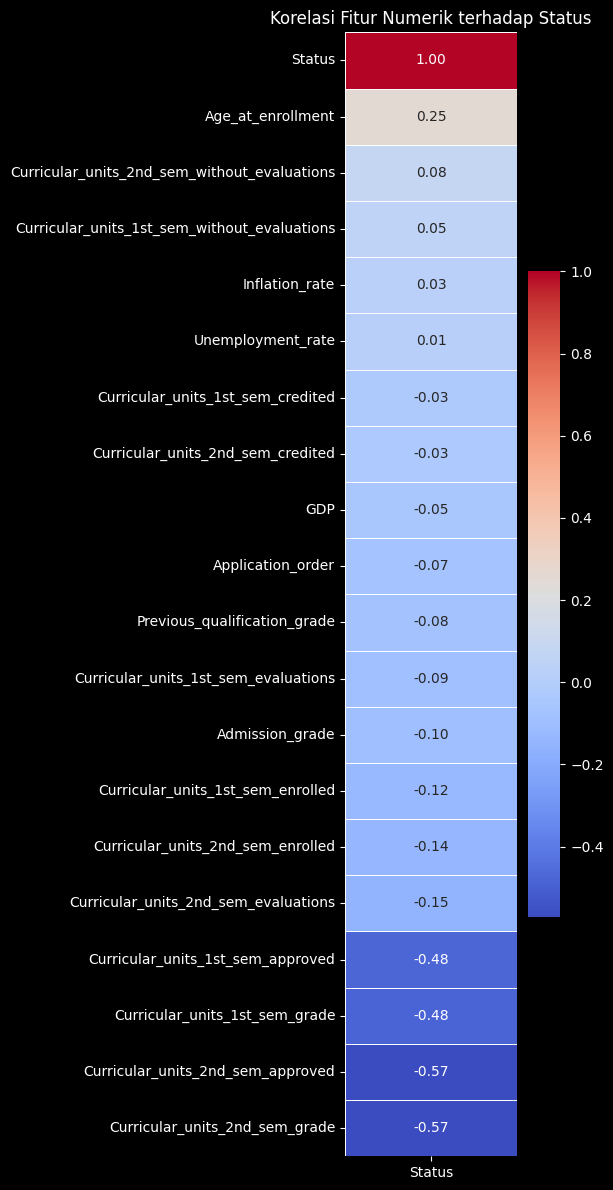

In [30]:
# Buat heatmap vertikal untuk korelasi terhadap Attrition
plt.figure(figsize=(6, 12))
sns.heatmap(correlation_with_status.to_frame(), annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", cbar=True)
plt.title('Korelasi Fitur Numerik terhadap Status')
plt.tight_layout()
plt.show()

Berdasarkan heatmap, kita dapat melihat fitur-fitur yang memiliki korelasi signifikan dengan target 'Status'. Fitur-fitur ini akan menjadi fokus utama dalam analisis lebih lanjut. Berikut adalah fitur yang akan digunakan untuk analisis lebih lanjut berdasarkan hasil korelasi diatas:

| No | Fitur                                | Korelasi Terhadap Target |
|----|--------------------------------------|----------------------------|
| 1  | Age_at_enrollment                    | 0.254215                   |
| 2  | Curricular_units_1st_sem_approved    | -0.479112                  |
| 3  | Curricular_units_1st_sem_grade       | -0.480669                  |
| 4  | Curricular_units_2nd_sem_approved    | -0.569500                  |
| 5  | Curricular_units_2nd_sem_grade       | -0.571792                  |


#### Analisis Kategorikal Feature

In [31]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))  # bias correction
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))

In [32]:
categorial_features = df.select_dtypes(include=['object']).columns.tolist()

for feature in categorial_features:
    print(f'Fitur {feature}\n' )
    print(df.value_counts(feature))

Fitur Marital_status

Marital_status
single               3919
married               379
divorced               91
facto union            25
legally separated       6
widower                 4
Name: count, dtype: int64
Fitur Application_mode

Application_mode
1st phase - general contingent                         1708
2nd phase - general contingent                          872
Over 23 years old                                       785
Change of course                                        312
Technological specialization diploma holders            213
Holders of other higher courses                         139
3rd phase - general contingent                          124
Transfer                                                 77
Change of institution/course                             59
1st phase - special contingent (Madeira Island)          38
Short cycle diploma holders                              35
International student (bachelor)                         30
1st phase - special 

In [34]:
# Hitung Cramér’s V antara tiap fitur kategorikal dengan Attrition
categorial_features = df.select_dtypes(include=['object']).columns.tolist()
cramers_results = {}
for feature in categorial_features:
    cramers_results[feature] = cramers_v(df[feature], df['Status'])

In [35]:
# Ubah ke DataFrame untuk ditampilkan
cramer_df = pd.DataFrame.from_dict(cramers_results, orient='index', columns=['CramersV'])
cramer_df = cramer_df.sort_values(by='CramersV', ascending=False)
cramer_df

,CramersV
Tuition_fees_up_to_date,0.428187
Application_mode,0.293925
Course,0.252620
Scholarship_holder,0.244359
Debtor,0.228176
Previous_qualification,0.205406
Gender,0.202942
Mothers_occupation,0.197409
Mothers_qualification,0.189054
Fathers_qualification,0.183287


Berdasarkan hasil diatas, berikut adalah feature categorical yang akan dikeep:

| No | Fitur                   | Korelasi terhadap Target |
|----|-------------------------|----------------------------|
| 1  | Tuition_fees_up_to_date | 0.428187                   |
| 2  | Application_mode        | 0.293925                   |
| 3  | Course                  | 0.252620                   |
| 4  | Scholarship_holder      | 0.244359                   |
| 5  | Debtor                  | 0.228176                   |
| 6  | Previous_qualification  | 0.205406                   |
| 7  | Gender                  | 0.202942                   |


## Data Preparation / Preprocessing

In [38]:
categorical_features = ['Tuition_fees_up_to_date', 'Application_mode', 'Course', 'Scholarship_holder', 
                        'Debtor', 'Previous_qualification', 'Gender']

numerical_features = [
    'Age_at_enrollment', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade'
]

In [39]:
X = df[categorical_features + numerical_features]
y = df['Status']

# --- Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [40]:
# Encoder untuk data kategorikal
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Encoder untuk data numerikal
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Gabungkan preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

## Modeling

In [41]:
# Definisi model
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
}

trained_models = {}
predictions = {}

Saya akan memakai ketiga model diatas untuk melakukan klasifikasi attrition karyawan yaitu:
1. Logistic Regression
2. Decision Tree
3. Random Forest

In [42]:
for name, clf in models.items():
    print(f"Training: {name}")
    
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])
    
    pipeline.fit(X_train, y_train)
    
    # Simpan pipeline dan prediksi
    trained_models[name] = pipeline
    predictions[name] = pipeline.predict(X_test)

Training: Logistic Regression
Training: Decision Tree
Training: Random Forest


## Evaluation


==== Evaluation: Logistic Regression ====
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       601
           1       0.79      0.80      0.80       284

    accuracy                           0.87       885
   macro avg       0.85      0.85      0.85       885
weighted avg       0.87      0.87      0.87       885



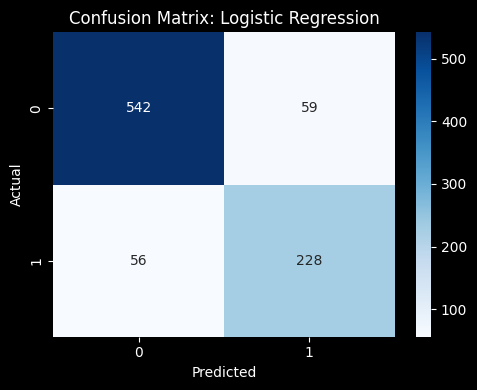


==== Evaluation: Decision Tree ====
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       601
           1       0.71      0.74      0.73       284

    accuracy                           0.82       885
   macro avg       0.79      0.80      0.80       885
weighted avg       0.82      0.82      0.82       885



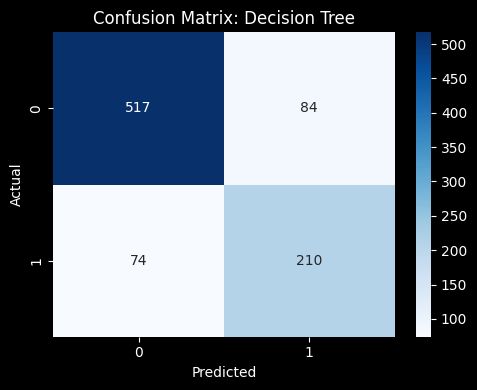


==== Evaluation: Random Forest ====
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       601
           1       0.84      0.73      0.78       284

    accuracy                           0.87       885
   macro avg       0.86      0.83      0.84       885
weighted avg       0.87      0.87      0.87       885



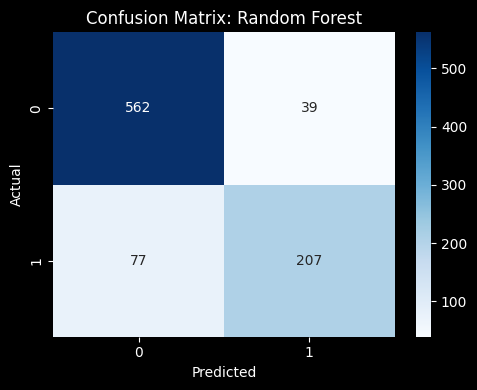

In [43]:
for name in trained_models.keys():
    print(f"\n==== Evaluation: {name} ====")

    y_pred = predictions[name]
    
    # Classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

Berdasarkan hasil diatas, Hasil model Logistic Regression dan Random Forest kurang lebih hampir sama dan lebih baik daripada model Decision Tree. Tetapi, jika dilihat dari confussion matrix diatas, Logistic Regression mampu memprediksi **228 siswa** yang akan dropout dengan benar dan itu menjadi yang terbanyak dibandingkan Random Forest (207) dan Decision Tree (210). Sehingga, saya akan menggunakan **Logistic Regression** untuk model prediksi apakah siswa akan dropout atau tidak.

In [44]:
# Simpan model terbaik Logistic Regression
joblib.dump(trained_models["Logistic Regression"], "logistic regression_model.pkl")

['logistic regression_model.pkl']